In [33]:
import numpy as np
import matplotlib.pyplot as plt
import os
import hdf5storage

In [34]:
data_path = '/home/isacco/DATASETS/Laminar Flame (ULB)-20250606T134228Z-1-001/Laminar Flame (ULB)'
os.listdir(data_path)


['X.mat', 'README.ipynb', 'Y.mat', 'Tensor.mat', 'Flame.png']

In [35]:
Tensor = hdf5storage.loadmat(os.path.join(data_path, 'Tensor.mat'))['Tensor']
Flipped_Tensor = np.flip(Tensor, axis=2)


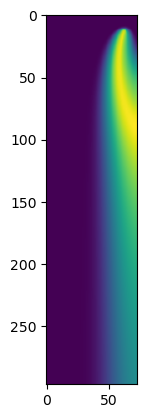

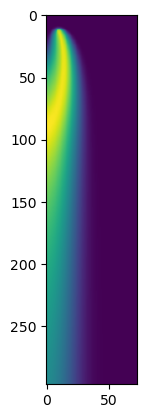

In [36]:
plt.imshow(Flipped_Tensor[0, :, :, 0])
plt.figure()
plt.imshow(Tensor[0, :, :, 0])


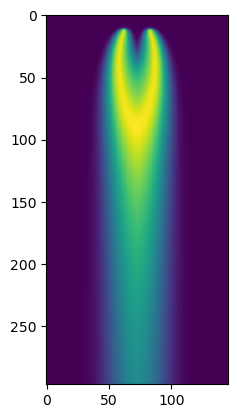

In [37]:
Flame_tensor = np.concatenate((Flipped_Tensor, Tensor), axis=2)
plt.imshow(Flame_tensor[0,:, :, 0])

In [38]:
component_names = ['T', 'O', 'O2', 'OH', 'H2O', 'CH4', 'CO', 'CO2', 'C2H2', 'N2']
component_index = 5
delta_t = 0.00025


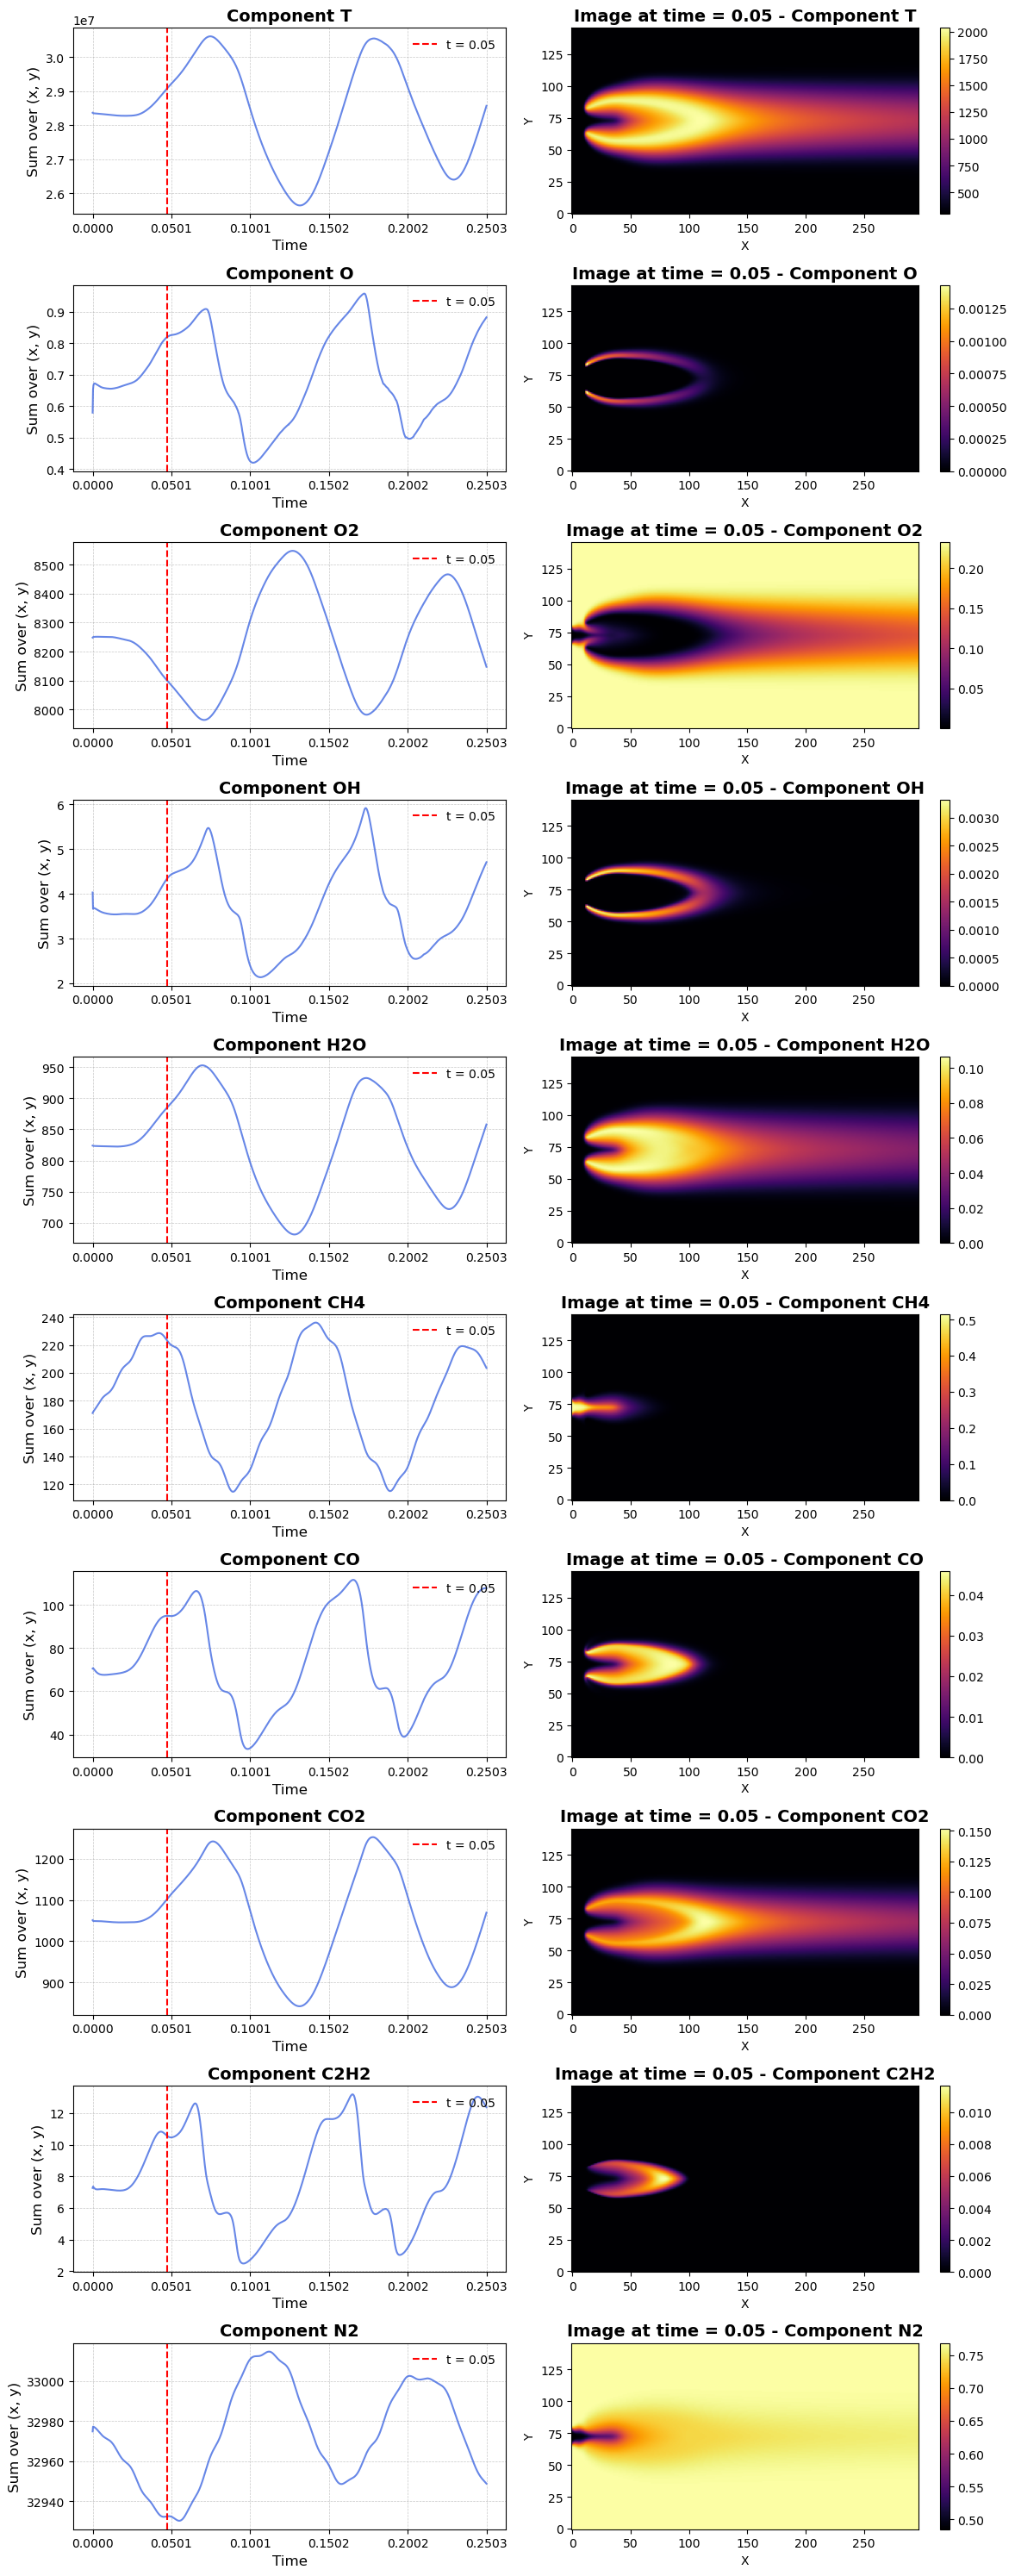

In [39]:
summed_data = Flame_tensor.sum(axis=(1, 2))

fig, axs = plt.subplots(nrows=len(component_names), ncols=2, figsize=(12, len(component_names)*3))

time_index = 189
time = time_index * delta_t
time_range = np.linspace(0, 1001 * delta_t, 1001)
xticks = np.linspace(0, time_range[-1], 6)

for i, data in enumerate(summed_data):
    axs[i, 0].plot(time_range, data, color='royalblue', linewidth=1.5, alpha=0.8)
    axs[i, 0].axvline(x=time, color='red', linestyle='--', linewidth=1.5, label=f't = {time:.2f}')
    
    axs[i, 0].set_xticks(xticks)
    axs[i, 0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    axs[i, 0].set_title(f'Component {component_names[i]}', fontsize=14, weight='bold')
    axs[i, 0].set_xlabel('Time', fontsize=12)
    axs[i, 0].set_ylabel('Sum over (x, y)', fontsize=12)
    
    axs[i, 0].tick_params(axis='both', which='major', labelsize=10)
    axs[i, 0].legend(loc='upper right', fontsize=10, frameon=False)


    im = axs[i, 1].imshow(Flame_tensor[i, :, :, time_index].T, origin='lower', aspect='auto', cmap = "inferno")
    axs[i, 1].set_title(f'Image at time = {time:.2f} - Component {component_names[i]}', fontsize=14, weight='bold')
    axs[i, 1].set_xlabel('X')
    axs[i, 1].set_ylabel('Y')
    fig.colorbar(im, ax=axs[i, 1], orientation='vertical')

plt.tight_layout()
plt.show()